In [26]:
from os.path import join, pardir
from dssg_challenge import (
    draw, 
    concat_results, 
    compute_cell_location,
    check_keyboard,
    compute_cost
)
import matplotlib.pyplot as plt

### English layout

In [2]:
RESULTS = join(pardir, 'data', 'log_all_en')
df_en = concat_results(RESULTS)

In [3]:
df_en.iloc[df_en.Fitness.argmin()]

Representation    [A, D, L, N, I, E,  , B, Y, K, G, O, C, U, R, ...
Fitness                                                      148144
Name: 0, dtype: object

In [15]:
en_layout = ''.join(df_en.iloc[df_en.Fitness.argmin(), 0])
en_layout

'ADLNIE BYKGOCUROTS^0,<?ZJWQVXPMFHW,#.'

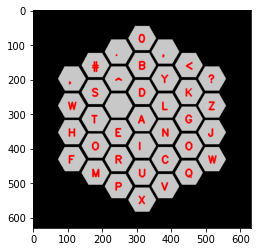

In [22]:
plt.imshow(draw(en_layout, compute_cell_location()))

### Portuguese layout

In [5]:
RESULTS = join(pardir, 'data', 'log_all_pt')
df_pt = concat_results(RESULTS)

In [6]:
df_pt.iloc[df_pt.Fitness.argmin()]

Representation    [ , D, #, S, E, A, O, F, ,, ., ^, P, M, U, R, ...
Fitness                                                      144947
Name: 0, dtype: object

In [8]:
''.join(df_pt.iloc[df_pt.Fitness.argmin(), 0])

" D#SEAOF,.^PMURTINC?K0<WJYXBQG'HLVH~Z"

### Baseline EN

In [29]:
DATA_DSSG = join(pardir, 'data', 'processed')

# get keys
with open(join(DATA_DSSG, 'en-keys.txt'), 'r') as file:
    keys = file.read()

# get corpus example
with open(join(DATA_DSSG, 'en-corpus.txt'), 'r') as file:
    corpus = file.read()

keys = ''.join(keys.split('\n'))
corpus = ''.join(corpus.split(keys)).split('\n')[0]

In [35]:
#webinar = ' EAIOTRNDMCYUSLGFWH_BQ#^<0ZV.KX_,?_JP'
webinar = 'EINOA TCGVDURL<^SWH_Z__XJQFPBMY,#.0K?'
check_keyboard(webinar, keys)
compute_cost(webinar, corpus)

154286.7518611742

In [36]:
(df_en.iloc[df_en.Fitness.argmin(),1] - compute_cost(webinar, corpus)) / compute_cost(webinar, corpus)

-0.03981090683368903